In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pypfopt import expected_returns

In [2]:
tickers = ["SPY"] 
stock_data = yf.download(tickers, period="10y")

[*********************100%%**********************]  1 of 1 completed


In [3]:
prices = pd.DataFrame(stock_data["Adj Close"].dropna(how="all"))
prices.tail()

,Adj Close
Date,
2023-11-03,434.690002
2023-11-06,435.690002
2023-11-07,436.929993
2023-11-08,437.250000
2023-11-09,433.839996


In [4]:
# Calculate Daily Returns
daily_returns = prices.pct_change()
daily_returns.head()

,Adj Close
Date,
2013-11-11,NaN
2013-11-12,-0.002030
2013-11-13,0.008024
2013-11-14,0.004989
2013-11-15,0.004351


In [5]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

,Adj Close
Date,
2013-11-11,NaN
2013-11-12,0.997970
2013-11-13,1.005978
2013-11-14,1.010997
2013-11-15,1.015396


In [6]:
stddev = daily_returns.std()
#stddev.sort_values(inplace=True)
stddev

Adj Close    0.011032
dtype: float64

In [7]:
stddev_annualized = stddev * np.sqrt(252)
stddev_annualized

Adj Close    0.175126
dtype: float64

In [8]:
sharpe_ratio = (daily_returns.mean() * 252) / (stddev_annualized)
sharpe_ratio

Adj Close    0.70394
dtype: float64

In [9]:
#Expected return = risk free premium + Beta (expected market return - risk free premium).  Investopedia
mu = expected_returns.capm_return(prices)
mu

Adj Close    0.113889
Name: mkt, dtype: float64

<Axes: xlabel='Date'>

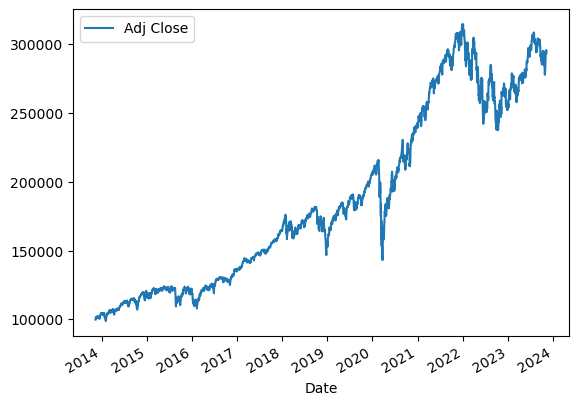

In [10]:
initial_investment = 100000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()